In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def make_hist(image):
    
    assert len(image.shape) == 2, "grayscale 영상을 입력해주세요."
    histogram = np.zeros((256), dtype=np.int32)
    h, w = image.shape
    
    for i in range(h):
        for j in range(w):
            histogram[image[i,j]] += 1
            
    return histogram
    

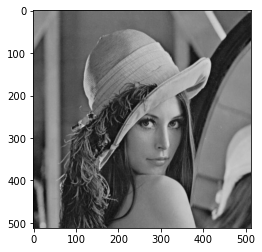

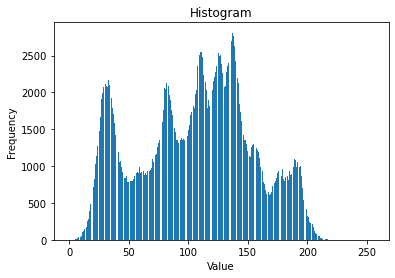

In [12]:
lena_image = cv2.imread('lena.png',0)
plt.imshow(lena_image, cmap='gray', vmin=0, vmax=255)
plt.figure()
lena_hist = make_hist(lena_image)

x = np.arange(256)
plt.bar(x, height=lena_hist)

plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

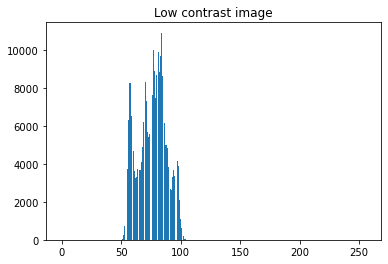

In [13]:
lena_before =cv2.imread('lena_low.png', 0)
h, w = np.shape(lena_before)

plt.figure()
lena_hist = make_hist(lena_before)
x = np.arange(256)
plt.bar(x, height=lena_hist)
plt.title("Low contrast image")
plt.show()

In [14]:
max_value = 0
min_value = 255

for i in np.arange(0,256,1):
    freq = lena_hist[i]
    if freq != 0:
        min_value = i
        break
for i in np.arange(255,-1,-1):
    freq = lena_hist[i]
    if freq != 0:
        max_value = i
        break
print("최소 밝기:", min_value)
print("최대 밝기: ", max_value)

최소 밝기: 50
최대 밝기:  106


In [22]:
max_value = 0 
min_value = 255

sum_low = 0
sum_high = 0
num_pixel = w * h 

for i in np.arange(0,256,1):
    freq = lena_hist[i]
    sum_low += freq
    if sum_low > num_pixel * 0.05:
        min_value = i
        break
        
        
for i in np.arange(255,-1,-1):
    freq = lena_hist[i]
    sum_high +=freq
    if sum_high > num_pixel * 0.05:
        max_value = i
        break

print("최소 밝기:", min_value)
print("최대 밝기: ", max_value)

최소 밝기: 57
최대 밝기:  96


In [23]:
slope =255/(max_value - min_value)
print("slope: ", slope)
print("(max - min) * slope: ",(max_value-min_value)*slope)

lena_after = np.zeros((h,w), dtype=np.uint8)

for i in range(h):
    for j in range(w):
        if lena_before[i, j]<min_value:
            lena_after[i, j] = 0
        elif lena_before[i, j]>max_value:
            lena_after[i, j] = 255
        else:
            lena_after[i, j] = (lena_before[i, j]-min_value)*slope

slope:  6.538461538461538
(max - min) * slope:  255.0


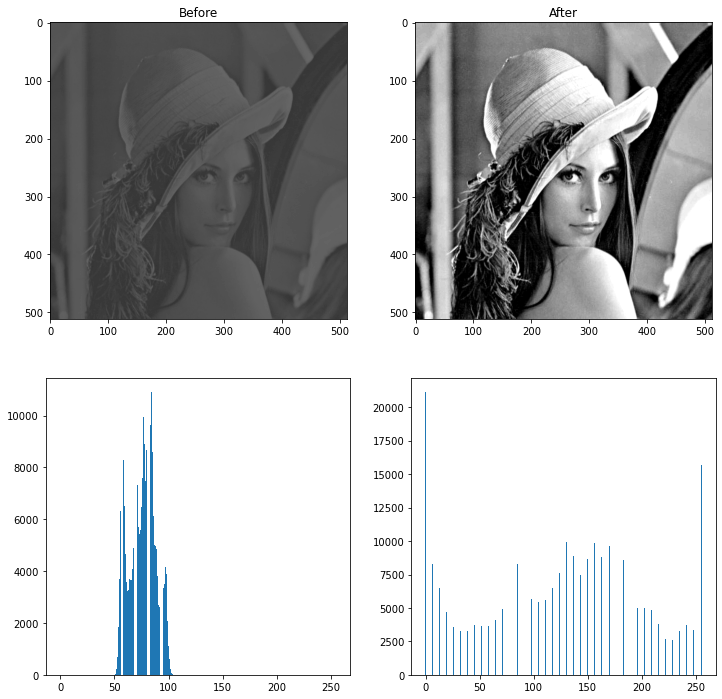

In [24]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.title("Before")
plt.imshow(lena_before, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title("After")
plt.imshow(lena_after, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,3)
before_hist = make_hist(lena_before)
x=np.arange(256)
plt.bar(x, height=before_hist)

plt.subplot(2,2,4)
after_hist = make_hist(lena_after)
x = np.arange(256)
plt.bar(x, height=after_hist)

plt.show()

In [37]:
lena_before = cv2.imread("lena_low.png", 0)
h, w = np.shape(lena_before)

lena_after = np.zeros((h,w), dtype=np.uint8)

unit = h*w / 256
print("영상크기: ", h, w)
print("unit: ", unit)

lena_hist = make_hist(lena_before)

T=np.zeros((256))
hist_sum = 0
for i in range(256):
    hist_sum += lena_hist[i]
    T[i] = hist_sum//unit
    
print("T: ", T)
    
for i in range(h):
    for j in range(w):
        lena_after[i,j] = T[lena_before[i,j]]

영상크기:  512 512
unit:  1024.0
T:  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   6.
  12.  20.  28.  35.  39.  43.  46.  49.  53.  56.  60.  64.  69.  75.
  83.  90.  95. 101. 106. 112. 120. 130. 138. 146. 154. 164. 172. 182.
 192. 201. 207. 212. 216. 221. 225. 228. 230. 233. 237. 240. 244. 248.
 252. 254. 255. 255. 255. 255. 255. 255. 256. 256. 256. 256. 256. 256.
 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256.
 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256.
 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256.
 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256.
 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256.
 256. 256. 256. 256. 256. 256. 256. 256. 256

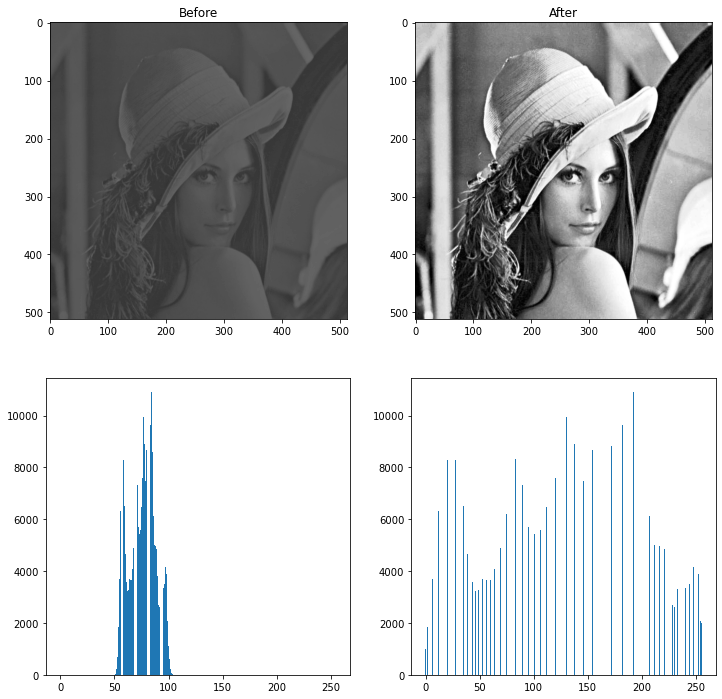

In [38]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.title("Before")
plt.imshow(lena_before, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title("After")
plt.imshow(lena_after, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,3)
before_hist = make_hist(lena_before)
x=np.arange(256)
plt.bar(x, height=before_hist)

plt.subplot(2,2,4)
after_hist = make_hist(lena_after)
x=np.arange(256)
plt.bar(x, height=after_hist)

plt.show()



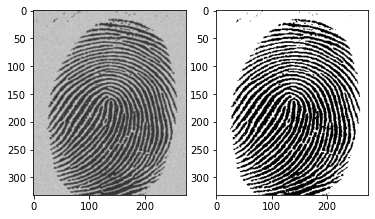

In [39]:
finger_image = cv2.imread("finger_print.png",  0)
h,w = np.shape(finger_image)

thresh_image = np.zeros((h,w), dtype=np.uint8)

thresh_value = 120

for i in range(h):
    for j in range(w):
        if finger_image[i,j] < thresh_value:
            thresh_image[i,j] = 0
        else:
            thresh_image[i,j] = 255
            
plt.figure()
plt.subplot(1,2,1)
plt.imshow(finger_image, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.imshow(thresh_image, cmap='gray', vmin=0, vmax=255)
                

Otsu 알고리즘이 찾아낸 임계치:  127.0


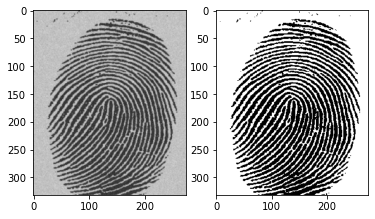

In [40]:
finger_image = cv2.imread("finger_print.png", 0)
th, thresh_image = cv2.threshold(finger_image, 0, 255, cv2.THRESH_OTSU)

print("Otsu 알고리즘이 찾아낸 임계치: ", th)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(finger_image, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.imshow(thresh_image, cmap='gray', vmin= 0, vmax=255)